In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import fft 
from sklearn.decomposition import PCA

In [14]:
def Data_Frame(data_name,log_freq):
    
    #funzione che crea il data_frame aggiungendo l'asse temporale ed elimina le colonne che non ci interessano
    #data_name è la stringa con il nome del file
    #log_freq è la frequenza di campionamento per creare l'asse dei tempi (center_sternum=200)
    #                                                                     (altri dataset=100)

    data_frame=pd.read_csv(data_name,sep=None,engine='python')
    data_frame['time_s'] = np.arange(0,data_frame.shape[0])/log_freq
    data_frame=data_frame.set_index('time_s')
    data_frame=data_frame.drop(columns=['Log Mode','Log Freq','Timestamp','qw','qi','qj','qk'])
    
    return data_frame

In [ ]:
def sensor_plot(data_frame, sensor, title, unit):
    
    #funzione che plotta gli assi dei sensori
    #title è una stringa
    #unit è una stringa (tipo '[mg]')
    #sensor vuole qualcosa del tipo "acc_columns = ['AccX','AccY','AccZ']"
    
    figure, axes = plt.subplots(1, 3, figsize=(22,3))
    figure.suptitle(title)    

    for i in range(3):
        data_frame.plot(ax=axes[i],y=sensor[i], ylabel= unit, xlabel='time [s]')
    



In [ ]:
def clean_up(data_frame, sensor):
    
    #funzione che seleziona le componenti della PCA e toglie il drift
    #sensor vuole qualcosa del tipo "acc_columns = ['AccX','AccY','AccZ']"
        
    pca=PCA(n_components=2) 
    
    pca.fit(data_frame[sensor])
    sensorT=pca.transform(data_frame[sensor])  
    
    sensor_clean=np.zeros_like(sensorT)
    drift_sensor=np.zeros_like(sensorT)
    
    for i in range(2):
        drift_sensor[i]=np.polyfit(data_frame.index,sensorT[:,i],1)
        sensor_clean[:,i]=sensorT[:,i]-(drift_sensor[i,0]*data_frame.index + drift_sensor[i,1])
        
    return sensor_clean
        

In [ ]:
def PCA_plot (data_frame, sensor, title, unit):
    
    #funzione che plotta le componenti della PCA e la sua FT
    #title è una stringa
    #unit è una stringa (tipo '[mg]')
    #sensor vuole qualcosa del tipo "acc_columns = ['AccX','AccY','AccZ']"
    
    sampling_rate = 200 
    sample_spacing = 1/sampling_rate
    
    pca=PCA(n_components=2) 
    pca.fit(data_frame[sensor])
    
    sensorT=pca.transform(data_frame[sensor]) 
    
    sensorT_FT1=fft.fft(sensorT[:,0])
    sensorT_FT2=fft.fft(sensorT[:,1])
    sensorT_FT_freq=fft.fftfreq(sensorT[:,0].size,sample_spacing)
    N = int(sensorT_FT_freq.size/2) 
    
    with plt.rc_context({"figure.figsize" : (20,6)}):
        fig,axs = plt.subplots(2,2)
        fig.suptitle(title)
        axs[0,0].plot(data_frame.index,sensorT[:,0],label='First component')
        axs[0,0].legend(loc='upper right')
        axs[0,0].set_title("Transformed vector's components projection")
        axs[0,0].set_ylabel(unit)
        axs[0,1].plot(sensorT_FT_freq[:N],np.abs(sensorT_FT1[:N]))
        axs[0,1].set_title("FT")
        axs[0,1].set_ylabel('power')
        axs[1,0].plot(data_frame.index,sensorT[:,1],label='Second component')
        axs[1,0].legend(loc='upper right')
        axs[1,0].set_xlabel('time [s]')
        axs[1,0].set_ylabel(unit)
        axs[1,1].plot(sensorT_FT_freq[:N],np.abs(sensorT_FT2[:N]))
        axs[1,1].set_xlabel('frequency [Hz]')
        axs[1,1].set_ylabel('power');

    print('*',title,'\n')
    print("Percentage of variance due to the first component: {:.2%}".format(pca.explained_variance_ratio_[0]))
    print("Percentage of variance due to the second component: {:.2%}".format(pca.explained_variance_ratio_[1]),'\n')

In [15]:
df1=Data_Frame("1_Stave_supine_static.txt",100)
df2=Data_Frame("2_Mattress_supine.txt",100)
df3=Data_Frame("3_Subject_sitting_chair.txt",100)
df4=Data_Frame("4_Chest_sweater.txt",100)
df5=Data_Frame("5_Under_chair.txt",100)

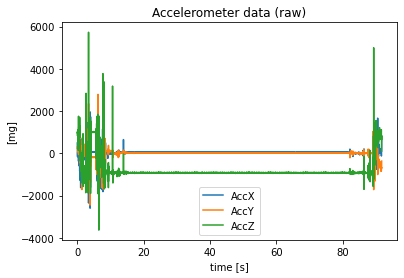

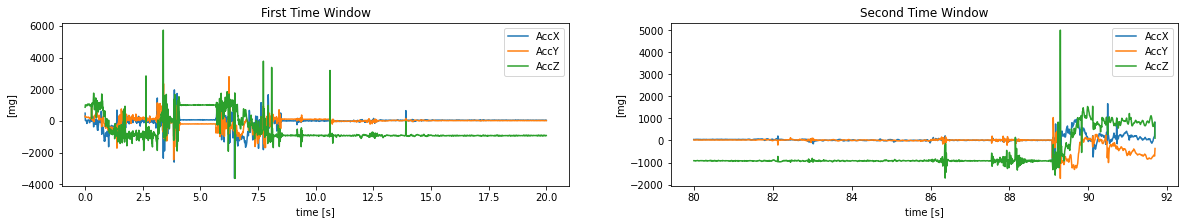

In [24]:
#1_Stave_supine_static

df1.plot(y=['AccX','AccY','AccZ'], title= 'Accelerometer data (raw)',ylabel='[mg]', xlabel='time [s]')

figure, axes = plt.subplots(1, 2, figsize=(20,3))
df1.loc[0:20].plot(ax=axes[0],y=['AccX','AccY','AccZ'],title='First Time Window',ylabel='[mg]', xlabel='time [s]')
df1.loc[80:].plot(ax=axes[1],y=['AccX','AccY','AccZ'],title='Second Time Window',ylabel='[mg]', xlabel='time [s]');

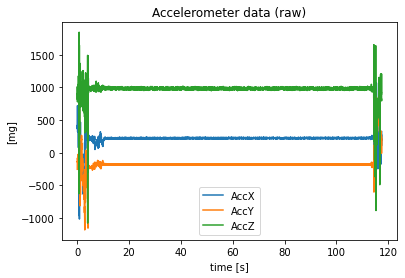

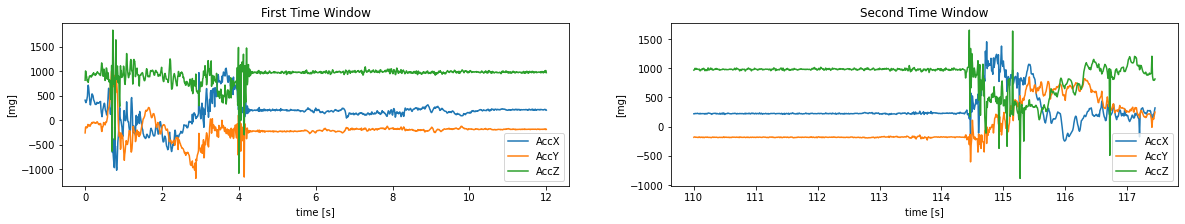

In [28]:
#2_Mattress_supine

df2.plot(y=['AccX','AccY','AccZ'], title= 'Accelerometer data (raw)',ylabel='[mg]', xlabel='time [s]')

figure, axes = plt.subplots(1, 2, figsize=(20,3))
df2.loc[0:12].plot(ax=axes[0],y=['AccX','AccY','AccZ'],title='First Time Window',ylabel='[mg]', xlabel='time [s]')
df2.loc[110:].plot(ax=axes[1],y=['AccX','AccY','AccZ'],title='Second Time Window',ylabel='[mg]', xlabel='time [s]');

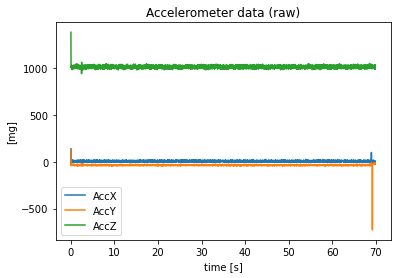

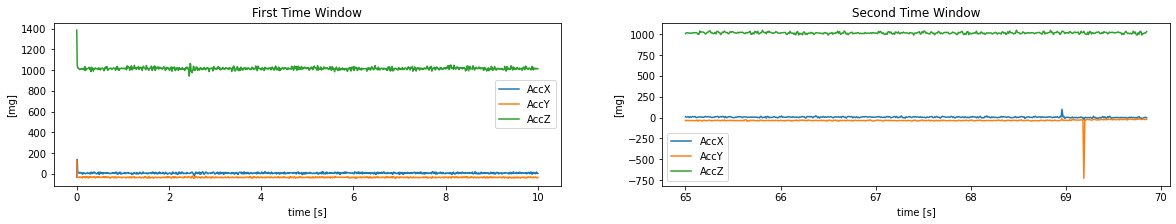

In [30]:
#3_Subject_sitting_chair

df3.plot(y=['AccX','AccY','AccZ'], title= 'Accelerometer data (raw)',ylabel='[mg]', xlabel='time [s]')

figure, axes = plt.subplots(1, 2, figsize=(20,3))
df3.loc[0:10].plot(ax=axes[0],y=['AccX','AccY','AccZ'],title='First Time Window',ylabel='[mg]', xlabel='time [s]')
df3.loc[65:].plot(ax=axes[1],y=['AccX','AccY','AccZ'],title='Second Time Window',ylabel='[mg]', xlabel='time [s]');

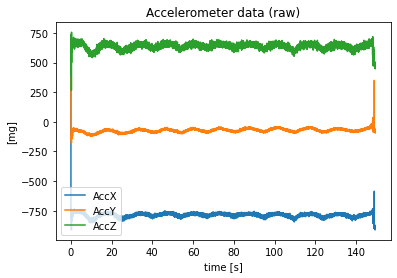

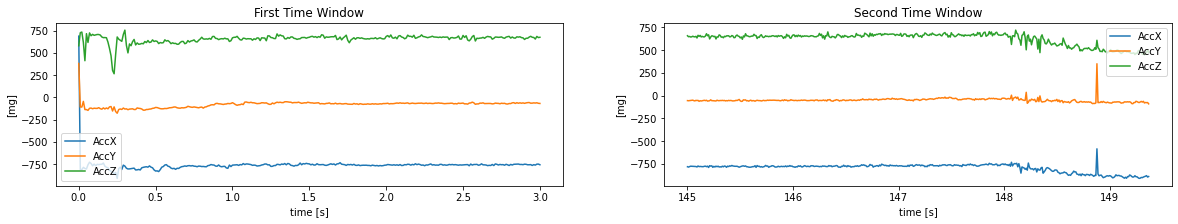

In [32]:
#4_Chest_sweater.txt

df4.plot(y=['AccX','AccY','AccZ'], title= 'Accelerometer data (raw)',ylabel='[mg]', xlabel='time [s]')

figure, axes = plt.subplots(1, 2, figsize=(20,3))
df4.loc[0:3].plot(ax=axes[0],y=['AccX','AccY','AccZ'],title='First Time Window',ylabel='[mg]', xlabel='time [s]')
df4.loc[145:].plot(ax=axes[1],y=['AccX','AccY','AccZ'],title='Second Time Window',ylabel='[mg]', xlabel='time [s]');

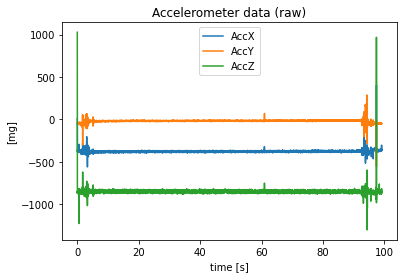

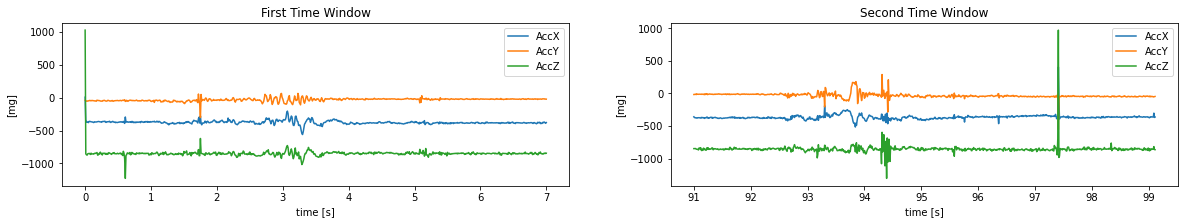

In [34]:
#5_Under_chair.txt

df5.plot(y=['AccX','AccY','AccZ'], title= 'Accelerometer data (raw)',ylabel='[mg]', xlabel='time [s]')

figure, axes = plt.subplots(1, 2, figsize=(20,3))
df5.loc[0:7].plot(ax=axes[0],y=['AccX','AccY','AccZ'],title='First Time Window',ylabel='[mg]', xlabel='time [s]')
df5.loc[91:].plot(ax=axes[1],y=['AccX','AccY','AccZ'],title='Second Time Window',ylabel='[mg]', xlabel='time [s]');